# Titanic survived Project

In [120]:
# 1st step : I import all the important Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [136]:
# 2nd step : Getting the titanic csv file
df = pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Visualization :

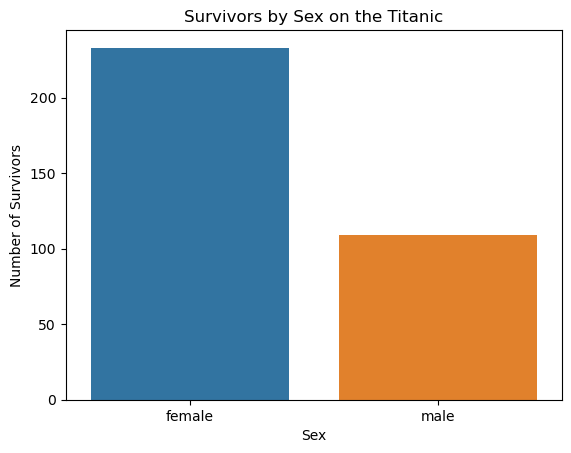

In [122]:
# How many male and female survived ?
survived_df = df[df['Survived'] == 1]
survived_by_sex = survived_df['Sex'].value_counts()

sns.barplot(x=survived_by_sex.index, y=survived_by_sex.values)
plt.title("Survivors by Sex on the Titanic")
plt.xlabel("Sex")
plt.ylabel("Number of Survivors")
plt.show()

# My Observation :
#   1. Female srvived more in titanic accident

'\n Pclass 1 is most expensive , then Pclass 2 and then Pclass 3\n'

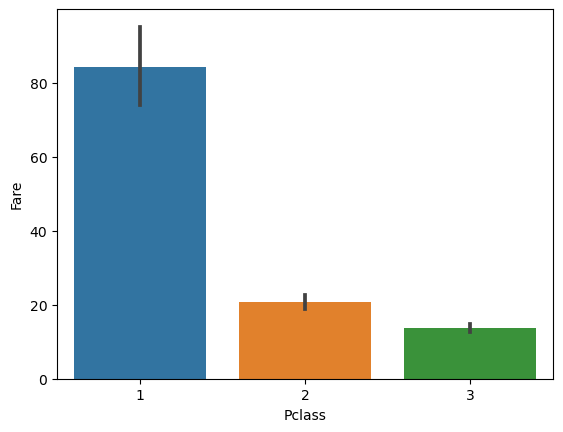

In [123]:
# Which class is most expensive
sns.barplot(x = "Pclass", y = "Fare", data = df )

# My Observation :
"""
 Pclass 1 is most expensive , then Pclass 2 and then Pclass 3
"""

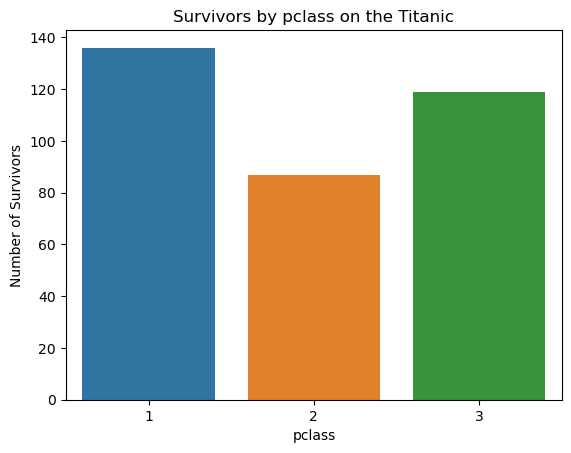

In [124]:
# From which Pclass people survived the most
survived_df = df[df['Survived'] == 1]
survived_by_pclass = survived_df['Pclass'].value_counts()

sns.barplot(x=survived_by_pclass.index, y=survived_by_pclass.values)
plt.title("Survivors by pclass on the Titanic")
plt.xlabel("pclass")
plt.ylabel("Number of Survivors")
plt.show()

'\n* In all the classes , male are more than female\n* In pclass 1, male are in the range of 130-150 , female are below 100\n* In pclass 2, male are almost in the range of 120 - 100 and female are less than 90\n* In pclass 3 , male are above 300 and female are almost 150\n'

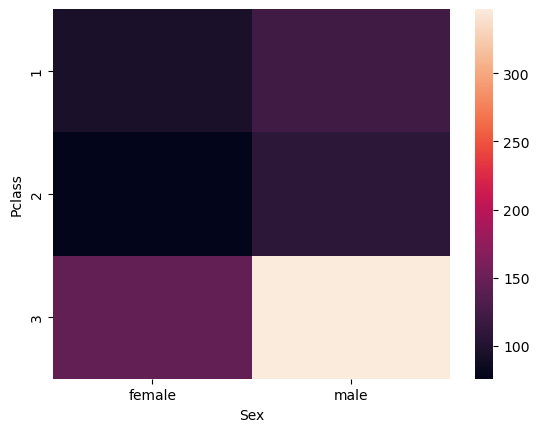

In [130]:
# How many male and female are there in each class :
sns.heatmap(pd.crosstab(df['Pclass'],df['Sex']))

# My observation :
"""
* In all the classes , male are more than female
* In pclass 1, male are in the range of 130-150 , female are below 100
* In pclass 2, male are almost in the range of 120 - 100 and female are less than 90
* In pclass 3 , male are above 300 and female are almost 150
"""

<Axes: xlabel='SibSp', ylabel='Survived'>

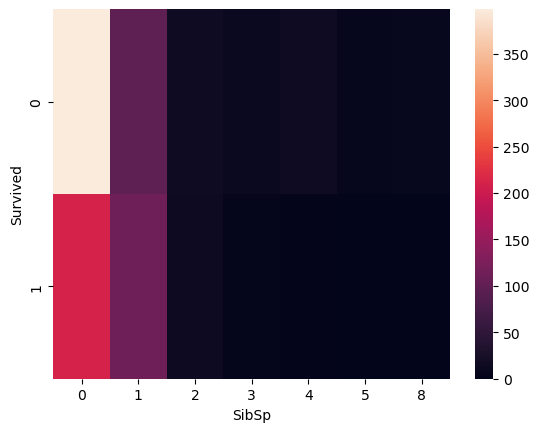

In [131]:
# Is there any relation between Survived and SibSp
sns.heatmap(pd.crosstab(df['Survived'],df['SibSp']) )

'\n1. in Pclass 1, average age is high, then  inn Pclass 2 , then in Pclass 3\n\n'

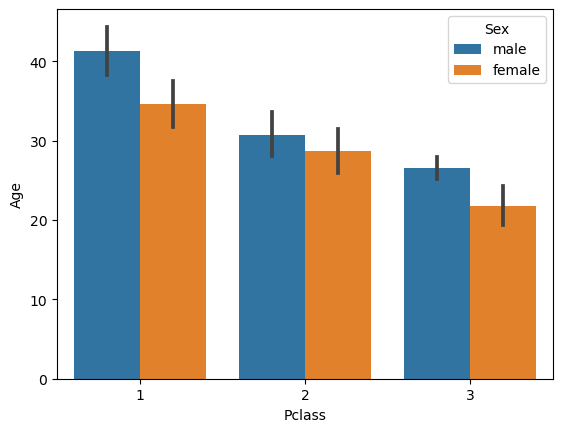

In [132]:
sns.barplot(x = "Pclass", y = "Age", data = df , hue = 'Sex')

# My observation :
"""
1. in Pclass 1, average age is high, then  inn Pclass 2 , then in Pclass 3

"""

"\nThe columns 'PassengerId','Name','Ticket','Cabin','Fare' are not important\n"

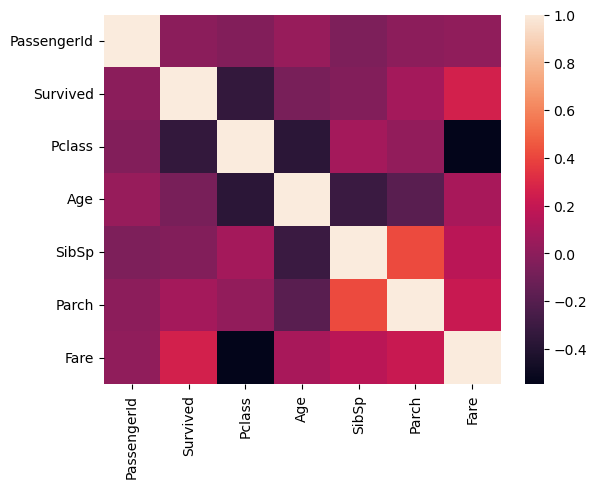

In [133]:
# Checking correlation
sns.heatmap(df.corr())
# My Observation :
"""
The columns 'PassengerId','Name','Ticket','Cabin','Fare' are not important
"""

# Data Preprocessing :

In [137]:
# Deleting un-important columns :
df  = df.drop(columns = ['PassengerId','Name','Ticket','Cabin','Fare','Embarked'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,NaN,1,2
889,1,1,male,26.0,0,0


In [139]:
#Encoding Catagorical column 'Sex'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_df = df
new_df['sex'] = le.fit_transform(new_df['Sex'])
new_df = new_df.drop(columns = ['Sex'])
new_df

,Survived,Pclass,Age,SibSp,Parch,sex
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1
...,...,...,...,...,...,...
886,0,2,27.0,0,0,1
887,1,1,19.0,0,0,0
888,0,3,NaN,1,2,0
889,1,1,26.0,0,0,1


# Handling Missing Values :

In [141]:
# Checking the information of the columns :
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   sex       891 non-null    int32  
dtypes: float64(1), int32(1), int64(4)
memory usage: 38.4 KB


In [142]:
# Checking if there any null value is there in the columns :
new_df.isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
sex           0
dtype: int64

In [143]:
# The 'Age' column has the null values
# I will replace the null values with average Age
new_df['Age'] = new_df['Age'].fillna(new_df['Age'].mean())
new_df.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
sex         0
dtype: int64

# Handling Outliers :

In [144]:
# First converting 'Age' column's datatype to int
new_df['Age'] = new_df['Age'].astype(int)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Age       891 non-null    int32
 3   SibSp     891 non-null    int64
 4   Parch     891 non-null    int64
 5   sex       891 non-null    int32
dtypes: int32(2), int64(4)
memory usage: 34.9 KB


In [146]:
# Seeing the details of the dataset
new_df.describe()
# From here , I can conclude that the outliers of 'Age' column is important

,Survived,Pclass,Age,SibSp,Parch,sex
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.544332,0.523008,0.381594,0.647587
std,0.486592,0.836071,13.013778,1.102743,0.806057,0.477990
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,1.000000


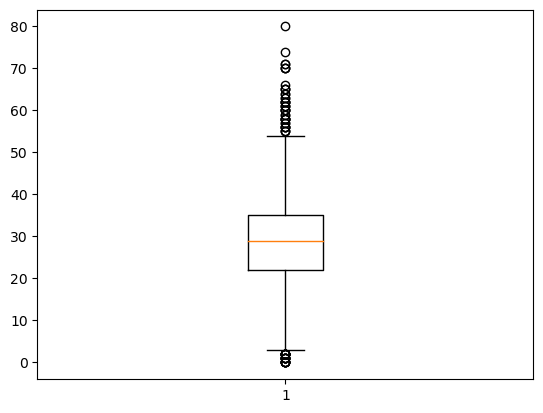

In [147]:
# Checking the 'Age' column's Outliers
plt.boxplot(new_df['Age'])
plt.show()

In [148]:
# Checking the z-score value
z = np.abs(zscore(new_df))
z

,Survived,Pclass,Age,SibSp,Parch,sex
0,0.789272,0.827377,0.580044,0.432793,0.473674,0.737695
1,1.266990,1.566107,0.650112,0.432793,0.473674,1.355574
2,1.266990,0.827377,0.272505,0.474545,0.473674,1.355574
3,1.266990,1.566107,0.419458,0.432793,0.473674,1.355574
4,0.789272,0.827377,0.419458,0.474545,0.473674,0.737695
...,...,...,...,...,...,...
886,0.789272,0.369365,0.195620,0.474545,0.473674,0.737695
887,1.266990,1.566107,0.810699,0.474545,0.473674,1.355574
888,0.789272,0.827377,0.041851,0.432793,2.008933,1.355574
889,1.266990,1.566107,0.272505,0.474545,0.473674,0.737695


In [149]:
# Checking which rows has  z-score value greater than 3
threshold = 3
print(np.where(z>3))

(array([ 13,  16,  25,  50,  59,  68,  71,  86,  96, 116, 119, 159, 164,
       167, 171, 180, 182, 201, 233, 261, 266, 278, 324, 360, 386, 437,
       438, 480, 493, 541, 542, 567, 610, 630, 638, 672, 678, 683, 686,
       736, 745, 774, 787, 792, 813, 824, 846, 850, 851, 858, 863, 885],
      dtype=int64), array([4, 3, 4, 3, 3, 3, 3, 4, 2, 2, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 3, 4, 4, 3, 2, 3, 3, 4, 4, 2, 4, 2, 4, 3, 3, 4, 2, 4, 3, 3,
       3, 3, 3, 3, 2, 4, 3, 4], dtype=int64))


In [150]:
# Getting only those rows which has z_score value less than 3 . Thus we get a new dataset with no outlier
Modified_df = new_df[(z<3).all(axis = 1)]
Modified_df

,Survived,Pclass,Age,SibSp,Parch,sex
0,0,3,22,1,0,1
1,1,1,38,1,0,0
2,1,3,26,0,0,0
3,1,1,35,1,0,0
4,0,3,35,0,0,1
...,...,...,...,...,...,...
886,0,2,27,0,0,1
887,1,1,19,0,0,0
888,0,3,29,1,2,0
889,1,1,26,0,0,1


In [151]:
Modified_df.describe()

,Survived,Pclass,Age,SibSp,Parch,sex
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,0.398093,2.281287,29.623361,0.357569,0.269368,0.650775
std,0.489797,0.840230,12.113573,0.639519,0.581253,0.477010
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,23.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,66.000000,3.000000,2.000000,1.000000


# Using Different Models :

In [153]:
X = Modified_df.drop(columns = ['Survived'])
y = Modified_df['Survived']

In [154]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.30 , random_state = 42)

# 1. Using Logistic Regression :

In [155]:
from sklearn.linear_model import LogisticRegression

In [156]:
lr =LogisticRegression()

In [157]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['lbfgs','newton-cg','sag'],
}

grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

y_pred_lr = grid_search.best_estimator_.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy score of Logistic Regression :", accuracy)
print('best parameters :',grid_search.best_params_)

Accuracy score of Logistic Regression : 0.7976190476190477
best parameters : {'penalty': 'l2', 'solver': 'lbfgs'}


In [158]:
print('cross validation score of Logistic Regression :',np.mean(cross_val_score(grid_search,X,y,cv  = 10 , scoring = 'accuracy')))

cross validation score of Logistic Regression : 0.7950086058519793


In [159]:
print(confusion_matrix(y_test , y_pred_lr))

[[138  15]
 [ 36  63]]


In [160]:
print(classification_report(y_test , y_pred_lr))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       153
           1       0.81      0.64      0.71        99

    accuracy                           0.80       252
   macro avg       0.80      0.77      0.78       252
weighted avg       0.80      0.80      0.79       252



In [161]:
"""
* I think Precision (Type 1)error is more important in this dataset . Because , If someone has survived
  and the model says he has not , then that is more dangerous
  
  LogisticRegression is Performing quite Good !

"""

'\n* I think Precision (Type 1)error is more important in this dataset . Because , If someone has survived\n  and the model says he has not , then that is more dangerous\n  \n  LogisticRegression is Performing quite Good !\n\n'

# 2. Using Support Vactor Machine :

In [162]:
from sklearn.svm import SVC

In [163]:
svc = SVC()
svc.fit(X_train , y_train)
y_pred_svc = svc.predict(X_test)
print('accuracy score of Support Vactor Classification :', accuracy_score( y_test , y_pred_svc))

accuracy score of Support Vactor Classification : 0.6150793650793651


In [164]:
print('cross validation score of Support Vactor Classification :',np.mean(cross_val_score(svc,X,y,cv  = 10 , scoring = 'accuracy')))

cross validation score of Support Vactor Classification : 0.6329173838209983


In [165]:
print(confusion_matrix(y_test , y_pred_svc))

[[149   4]
 [ 93   6]]


In [166]:
print(classification_report(y_test , y_pred_svc))

              precision    recall  f1-score   support

           0       0.62      0.97      0.75       153
           1       0.60      0.06      0.11        99

    accuracy                           0.62       252
   macro avg       0.61      0.52      0.43       252
weighted avg       0.61      0.62      0.50       252



In [167]:
"""
    Support Vactor Classifier is not performing well !
"""

'\n    Support Vactor Classifier is not performing well !\n'

# 3. Using KNeighbors Classifier

In [168]:
from sklearn.neighbors import KNeighborsClassifier

In [169]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3,5,7,10,15 , 20 , 25 , 30],
    'weights': ['uniform','distance'],
}

grid_search_knn = GridSearchCV(knn, param_grid, cv=5)
grid_search_knn.fit(X_train, y_train)

y_pred_knn = grid_search_knn.best_estimator_.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy score of KNeighborsClassifier :", accuracy)
print('best parameters :',grid_search_knn.best_params_)

Accuracy score of KNeighborsClassifier : 0.7301587301587301
best parameters : {'n_neighbors': 7, 'weights': 'uniform'}


In [170]:
print('cross validation score of KNeighborsClassifier :',np.mean(cross_val_score(grid_search_knn,X,y,cv  = 10 , scoring = 'accuracy')))

cross validation score of KNeighborsClassifier : 0.7866465863453815


In [171]:
print(confusion_matrix(y_test , y_pred_knn))

[[131  22]
 [ 46  53]]


In [172]:
print(classification_report(y_test , y_pred_knn))

              precision    recall  f1-score   support

           0       0.74      0.86      0.79       153
           1       0.71      0.54      0.61        99

    accuracy                           0.73       252
   macro avg       0.72      0.70      0.70       252
weighted avg       0.73      0.73      0.72       252



In [173]:
"""
K Neighbours Classifiers is quite OK ! Not better than Logistic Regression in  terms of Precision also .
"""

'\nK Neighbours Classifiers is quite OK ! Not better than Logistic Regression in  terms of Precision also .\n'

# 4. Using Naive Bayes classifier :¶

In [174]:
from sklearn.naive_bayes import MultinomialNB

In [175]:
mnb = MultinomialNB()
mnb.fit(X_train , y_train)
y_pred_mnb = mnb.predict(X_test)
print("Accuracy score of KNeighborsClassifier :", accuracy_score(y_test ,y_pred_mnb))

Accuracy score of KNeighborsClassifier : 0.6865079365079365


In [176]:
print('cross validation score of KNeighborsClassifier :',np.mean(cross_val_score(mnb,X,y,cv  = 10 , scoring = 'accuracy')))

cross validation score of KNeighborsClassifier : 0.6949512335054504


In [177]:
print(confusion_matrix(y_test , y_pred_mnb))

[[136  17]
 [ 62  37]]


In [178]:
print(classification_report(y_test , y_pred_mnb))

              precision    recall  f1-score   support

           0       0.69      0.89      0.77       153
           1       0.69      0.37      0.48        99

    accuracy                           0.69       252
   macro avg       0.69      0.63      0.63       252
weighted avg       0.69      0.69      0.66       252



In [179]:
"""
Naive Bayes Classifier is not acceptable !
"""

'\nNaive Bayes Classifier is not acceptable !\n'

# 5. Using Decision Tree Classifier :

In [180]:
from sklearn.tree import DecisionTreeClassifier

In [182]:
dtc = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini','entropy'],
    'splitter':['best','random'],
    'max_depth': [3,5,7,10],
    'min_samples_split': [3,5,6,8],

}

grid_search_dtc = GridSearchCV(dtc, param_grid, cv=5)
grid_search_dtc.fit(X_train, y_train)

y_pred_dtc = grid_search_dtc.best_estimator_.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dtc)
print("Accuracy score of Decision Tree Classifier :", accuracy)
print('best parameters :',grid_search_dtc.best_params_)

Accuracy score of Decision Tree Classifier : 0.7976190476190477
best parameters : {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 3, 'splitter': 'best'}


In [183]:
print(confusion_matrix(y_test , y_pred_dtc))

[[136  17]
 [ 34  65]]


In [184]:
print(classification_report(y_test , y_pred_dtc))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       153
           1       0.79      0.66      0.72        99

    accuracy                           0.80       252
   macro avg       0.80      0.77      0.78       252
weighted avg       0.80      0.80      0.79       252



In [186]:
dt = DecisionTreeClassifier(max_depth = 10)
dt.fit(X_train , y_train)
pred_dt  = dt.predict(X_test)
print(accuracy_score(y_test , pred_dt))

0.7857142857142857


In [187]:
print(confusion_matrix(y_test ,pred_dt))

[[135  18]
 [ 36  63]]


In [ ]:
"""
Decision Tree Classifier is quite Good . But in Precision, It is performing bad as compared to Logistic Regression 
"""

# 6. Using Random Forest Classifier :

In [188]:
from sklearn.ensemble import RandomForestClassifier

In [189]:
rfc = RandomForestClassifier(n_estimators = 500 , criterion = 'gini' ,max_depth = 10)
rfc.fit(X_train , y_train)
y_pred_rfc = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rfc)
print("Accuracy score of Random Forest Classifier :", accuracy)

Accuracy score of Random Forest Classifier : 0.8055555555555556


In [190]:
print(confusion_matrix(y_test , y_pred_rfc))

[[135  18]
 [ 31  68]]


In [191]:
print(classification_report(y_test , y_pred_rfc))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       153
           1       0.79      0.69      0.74        99

    accuracy                           0.81       252
   macro avg       0.80      0.78      0.79       252
weighted avg       0.80      0.81      0.80       252



In [192]:
"""
Random Forest Classifier is also Performing Well !!
"""

'\nRandom Forest Classifier is also Performing Well !!\n'

# 7. Using Gradiant Boosting Classifier :

In [193]:
from sklearn.ensemble import GradientBoostingClassifier

In [197]:
gbc = GradientBoostingClassifier(n_estimators = 500 , max_depth = 1 )
gbc.fit(X_train , y_train)
y_pred_gbc = gbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gbc)
print("Accuracy score of Gradient Boosting Classifier :", accuracy)

Accuracy score of Gradient Boosting Classifier : 0.8055555555555556


In [198]:
print(confusion_matrix(y_test , y_pred_gbc))

[[138  15]
 [ 34  65]]


In [199]:
print(classification_report(y_test , y_pred_gbc))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       153
           1       0.81      0.66      0.73        99

    accuracy                           0.81       252
   macro avg       0.81      0.78      0.79       252
weighted avg       0.81      0.81      0.80       252



In [200]:
"""
Gradient Boosting Classifier is performing better as compared to all the above models
"""

'\nGradient Boosting Classifier is performing better as compared to all the above models\n'

# Using XGBoost :

In [201]:
import xgboost as xgb
dtrain = xgb.DMatrix( X_train, label= y_train)
params = {
    'eta': 0.1,
    'max_depth': 8,
    'subsample': 0.8,
    'colsample_bytree': 0.7,
    'silent': 1
}

# Train the model
model = xgb.train(params,dtrain , num_boost_round=100)

In [202]:
y_pred_xgb = model.predict(xgb.DMatrix( X_test, label= y_test))
accuracy_score(y_test , y_pred_xgb.round())

0.7976190476190477

In [203]:
print(confusion_matrix(y_test , y_pred_xgb.round()))

[[135  18]
 [ 33  66]]


In [204]:
print(classification_report(y_test , y_pred_xgb.round()))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       153
           1       0.79      0.67      0.72        99

    accuracy                           0.80       252
   macro avg       0.79      0.77      0.78       252
weighted avg       0.80      0.80      0.79       252



In [205]:
"""
XGBoost is performing very good in Precision .
"""

'\nXGBoost is performing very good in Precision .\n'

# 9. Using Voting Classifier :

In [206]:
from sklearn.ensemble import VotingClassifier

In [207]:
voting_clf = VotingClassifier(
   estimators = [
       ('dtc', DecisionTreeClassifier(criterion = 'gini', max_depth = 10)),
       ('rfc',RandomForestClassifier(n_estimators = 500 , criterion = 'gini' ,max_depth = 10  )),
       ('gbc',GradientBoostingClassifier(n_estimators = 500 , max_depth = 1))
   ])
voting_clf.fit(X_train , y_train)
voting_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, voting_pred)
print("Accuracy score of Voting Classifier :", accuracy)


Accuracy score of Voting Classifier : 0.8015873015873016


In [208]:
print(confusion_matrix(y_test , voting_pred))

[[137  16]
 [ 34  65]]


In [209]:
print(classification_report(y_test , voting_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       153
           1       0.80      0.66      0.72        99

    accuracy                           0.80       252
   macro avg       0.80      0.78      0.78       252
weighted avg       0.80      0.80      0.80       252



# 10 . Using Stacking Classifier :

In [210]:
from sklearn.ensemble import StackingClassifier

In [211]:
stacking_clf = StackingClassifier(
   estimators = [
       ('lr', LogisticRegression()),
       ('dtc', DecisionTreeClassifier(criterion = 'gini', max_depth = 10)),
       ('rfc',RandomForestClassifier(n_estimators = 500 , criterion = 'gini' ,max_depth = 10 , max_leaf_nodes = 16 )),
       ('gbc',GradientBoostingClassifier(learning_rate = 0.1 ,n_estimators = 500 , max_depth = 1))
   ],
   final_estimator = RandomForestClassifier(n_estimators = 500 , max_depth = 15),
   cv = 5
)


In [212]:
stacking_clf.fit(X_train , y_train)
stacking_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, stacking_pred)
print("Accuracy score of Stacking Classifier :", accuracy)

Accuracy score of Stacking Classifier : 0.7936507936507936


In [213]:
"""
So , after checking all the models , I would go for RandomForestClassifier 
"""

'\nSo , after checking all the models , I would go for RandomForestClassifier \n'

# Creating a prediction function :

In [216]:
def Titanic_Survived_Prediction(p):
    p = p.reshape(1,-1)
    pred = rfc.predict(p)
    if pred == 1 :
        print("Survived !")
    else :
        print("Not Survived !")

In [218]:
p = np.array([3,	30,	0,	0,	0])
Titanic_Survived_Prediction(p)

Not Survived !
